## XGBoost to predict formula one 

In [179]:
from xgboost import XGBClassifier, DMatrix
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [188]:
to_remove = ['70th_anniversary_grand_prix',
 'dutch_grand_prix',
 'eifel_grand_prix',
 'french_grand_prix',
 'german_grand_prix',
 'las_vegas_grand_prix',
 'mexican_grand_prix',
 'mexico_city_grand_prix',
 'miami_grand_prix',
 'portuguese_grand_prix',
 'qatar_grand_prix',
 'sakhir_grand_prix',
 'styrian_grand_prix',
 'são_paulo_grand_prix',
 'turkish_grand_prix',
 'tuscan_grand_prix',
 'trend_70th_anniversary_grand_prix',
 'trend_austrian_grand_prix',
 'trend_dutch_grand_prix',
 'trend_eifel_grand_prix',
 'trend_french_grand_prix',
 'trend_german_grand_prix',
 'trend_las_vegas_grand_prix',
 'trend_mexican_grand_prix',
 'trend_mexico_city_grand_prix',
 'trend_miami_grand_prix',
 'trend_portuguese_grand_prix',
 'trend_qatar_grand_prix',
 'trend_sakhir_grand_prix',
 'trend_saudi_arabian_grand_prix',
 'trend_spanish_grand_prix',
 'trend_styrian_grand_prix',
 'trend_são_paulo_grand_prix',
 'trend_turkish_grand_prix',
 'trend_tuscan_grand_prix',
 'trend_united_states_grand_prix',
 'alfa_romeo',
 'alphatauri',
 'aston_martin',
 'racing_point',
 'rb_f1_team',
 'renault',
 'sauber',
 'toro_rosso',
 'trend_alfa_romeo',
 'trend_alphatauri',
 'trend_racing_point',
 'trend_rb_f1_team',
 'trend_sauber',
 'constructor_rank_10',
 'driver_rank_11',
 'driver_rank_15',
 'driver_rank_16',
 'driver_rank_17',
 'driver_rank_18',
 'driver_rank_19',
 'driver_rank_20',
 'driver_rank_21',
 'driver_rank_22']


In [189]:
data = pd.read_excel("model_df.xlsx", index_col = 0)

fil = data.columns
y = data["end_position"].apply(lambda x: 6 if x > 5 else x).values - 1
X = data.drop(to_remove, axis = 1).copy()
X = X.drop(["time", "end_position", "race_date", "surname"], axis = 1)


In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Multiclass problem

In [191]:
{'colsample_bytree': 0.6491927426631225,
 'gamma': 0.4701324141987488,
 'learning_rate': 0.07455947908249963,
 'max_depth': 18.0,
 'min_child_weight': 3.0,
 'n_estimators': 570.0,
 'reg_alpha': 3.0,
 'reg_lambda': 0.2364467059303549}

{'colsample_bytree': 0.6491927426631225,
 'gamma': 0.4701324141987488,
 'learning_rate': 0.07455947908249963,
 'max_depth': 18.0,
 'min_child_weight': 3.0,
 'n_estimators': 570.0,
 'reg_alpha': 3.0,
 'reg_lambda': 0.2364467059303549}

In [210]:
params = {
    'gamma': 0.47,
    'max_depth': 18,
    'min_child_weight': 6,
    'reg_alpha': 3,
    'reg_lambda': 0.23,
    'objective': 'multi:softmax',
    'num_class': 6,
    'tree_method': 'hist',
    'learning_rate':  0.075,
    'n_estimators': 10000,
    'subsample': 0.8,
    'colsample_bytree': 0.65,
    'seed' : 123}

model = XGBClassifier(**params)

In [211]:
# Fit the model to the training data
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.65, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.47, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.075, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [214]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)


In [215]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66        37
           1       0.68      0.50      0.57        46
           2       0.62      0.61      0.61        38
           3       0.63      0.55      0.59        40
           4       0.83      0.49      0.61        39
           5       0.85      0.95      0.90       232

    accuracy                           0.77       432
   macro avg       0.70      0.64      0.66       432
weighted avg       0.77      0.77      0.76       432



In [216]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)

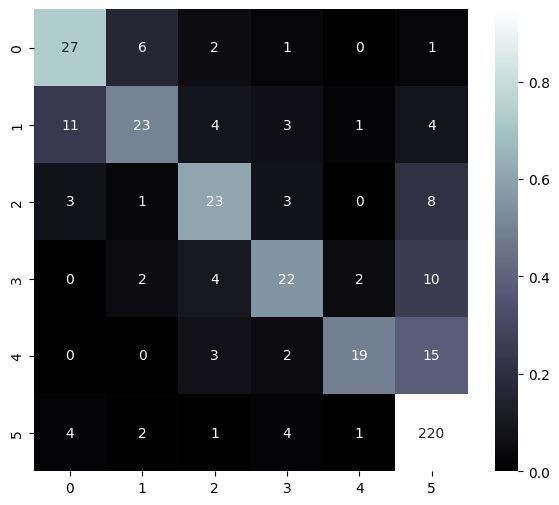

In [217]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = [0,1,2,3,4,5])

In [218]:
# Calculate accuracy
accuracy = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(mse)

# print(y_pred_proba, y_test)

Accuracy: 77.31%
1.1041666666666667


In [219]:
from sklearn.inspection import permutation_importance

# Calculate permutation feature importance
result = permutation_importance(
    model, X_test, y_test, scoring='neg_log_loss', n_repeats=10, random_state=42
)

# Get the feature importances and sort them in descending order
feature_importances = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)


In [220]:
feature_importances_2 = feature_importances.reset_index()
feature_importances_2

,index,0
0,driver_rp_rel_std,0.189490
1,constructor_rp_rel_std,0.114876
2,start_position_1,0.075998
3,start_position_2,0.074181
4,day,0.070611
...,...,...
115,trend_canadian_grand_prix,-0.000043
116,trend_chinese_grand_prix,-0.000044
117,alpine_f1_team,-0.000097
118,driver_rank_13,-0.000106


In [221]:
feature_importances.to_excel("features2.xlsx")

## Cross validataion

In [15]:
params_2 = {
    'gamma': 0.59,
    'max_depth': 15,
    'min_child_weight': 9,
    'reg_alpha': 0,
    'reg_lambda': 0.71,
    'objective': 'multi:softmax',
    'num_class': 6,
    'tree_method': 'hist',
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8}

In [239]:
# set(y)
np.unique(y)

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [240]:
y_train.shape

(1725,)

In [247]:

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

In [252]:
y_pred = cross_val_predict(model, X_test, y_test, cv=cv)

In [253]:
mean_squared_error(y_test, y_pred)

2.1180555555555554

## Hypertune

In [153]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [154]:
space6 = {'max_depth': hp.quniform("max_depth", 10, 20, 1),
        'gamma': hp.uniform ('gamma', 0.01,0.8),
        'reg_alpha' : hp.quniform('reg_alpha', 0.01,3,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0.1,0.5),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.1,1),
        'min_child_weight' : hp.quniform('min_child_weight', 3, 12, 1),
        'n_estimators' : hp.quniform('n_estimators', 400, 600, 10),
        'learning_rate' : hp.uniform('learning_rate', 0.01, 0.1)}


In [155]:

def objective(space):
    clf = XGBClassifier(
                    n_estimators = int(space['n_estimators']),
                    max_depth=int(space['max_depth']), 
                    gamma=space['gamma'],
                    reg_alpha=int(space['reg_alpha']),
                    min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=space['colsample_bytree'],  # Not cast to int
                    seed=123,
                    objective='multi:softmax',
                    num_class=6,
                    tree_method='hist',
                    learning_rate=space['learning_rate'],
                    subsample=0.8)

    clf.fit(X_train, y_train, verbose=False)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("SCORE:", mse)
    return {'loss': mse, 'status': STATUS_OK}


In [156]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space6,
                        algo = tpe.suggest,
                        max_evals = 500,
                        trials = trials)

  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]

SCORE:                                                 
2.4129554655870447                                     
SCORE:                                                                           
1.9878542510121457                                                               
SCORE:                                                                           
2.2550607287449393                                                               
SCORE:                                                                           
2.0121457489878543                                                               
SCORE:                                                                           
1.9190283400809716                                                               
SCORE:                                                                           
1.9838056680161944                                                               
SCORE:                                                              

In [157]:
best_hyperparams

{'colsample_bytree': 0.6491927426631225,
 'gamma': 0.4701324141987488,
 'learning_rate': 0.07455947908249963,
 'max_depth': 18.0,
 'min_child_weight': 3.0,
 'n_estimators': 570.0,
 'reg_alpha': 3.0,
 'reg_lambda': 0.2364467059303549}

## Prediction final

In [222]:
prediction_df = pd.read_excel("prediction_df.xlsx", index_col=0)

X_pred = prediction_df.drop(to_remove, axis = 1)
X_pred = X_pred.drop(["surname"], axis = 1)
X_pred = X_pred[X.columns] 

In [223]:
y_pred_proba = model.predict_proba(X_pred)
y_pred_proba_df = pd.DataFrame(y_pred_proba, columns = [0,1,2,3,4,5]) 

y_pred_proba_df
y_pred_proba_df["raceId"] = prediction_df["raceId"].values
y_pred_proba_df["surname"] = prediction_df["surname"].values


In [224]:
y_pred_proba_df

,0,1,2,3,4,5,raceId,surname
0,0.247039,0.455020,0.104591,0.041395,0.061726,0.090229,1127,norris
1,0.708835,0.233536,0.019174,0.020250,0.008611,0.009594,1127,verstappen
2,0.040188,0.163724,0.302143,0.258956,0.159197,0.075792,1127,leclerc
3,0.124700,0.233603,0.180860,0.272571,0.103590,0.084676,1127,pérez
4,0.019049,0.076080,0.341971,0.219040,0.263491,0.080368,1127,sainz
5,0.001411,0.010082,0.017077,0.030249,0.035000,0.906180,1127,hamilton
6,0.001203,0.003011,0.008263,0.008467,0.016893,0.962162,1127,tsunoda
7,0.003337,0.008399,0.027451,0.043732,0.046509,0.870572,1127,russell
8,0.001297,0.002438,0.007802,0.004903,0.012339,0.971221,1127,alonso
9,0.000718,0.001441,0.011647,0.003281,0.004919,0.977994,1127,ocon


In [226]:
y_pred_proba_df.to_excel("final_data.xlsx")